# Let's build an app that would help gardeners make data-driven decisions

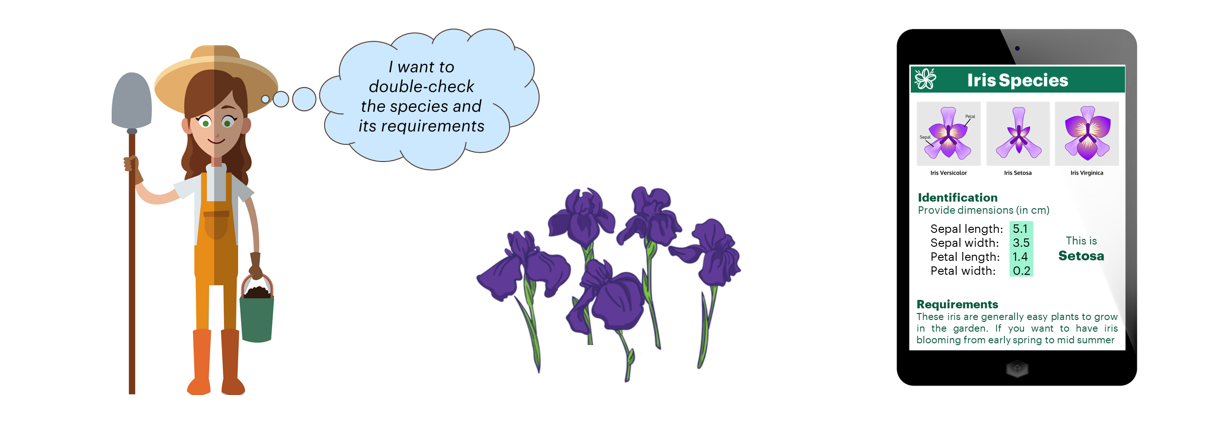

### The core of the application is a machine learning model, that based on dimensions of a sepal and a petal predicts Iris species: **setosa, versicolor, virginica**

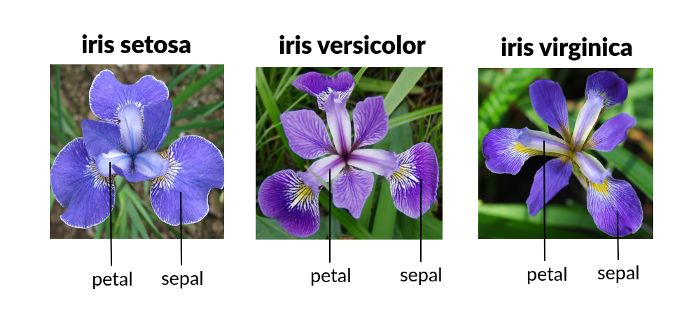

## Classification model for Iris species

In [10]:
from sklearn import datasets
import pandas as pd

In [11]:
# import some data to play with
iris = datasets.load_iris(as_frame=True)

In [12]:
iris.frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [15]:
iris.frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Simple visualization

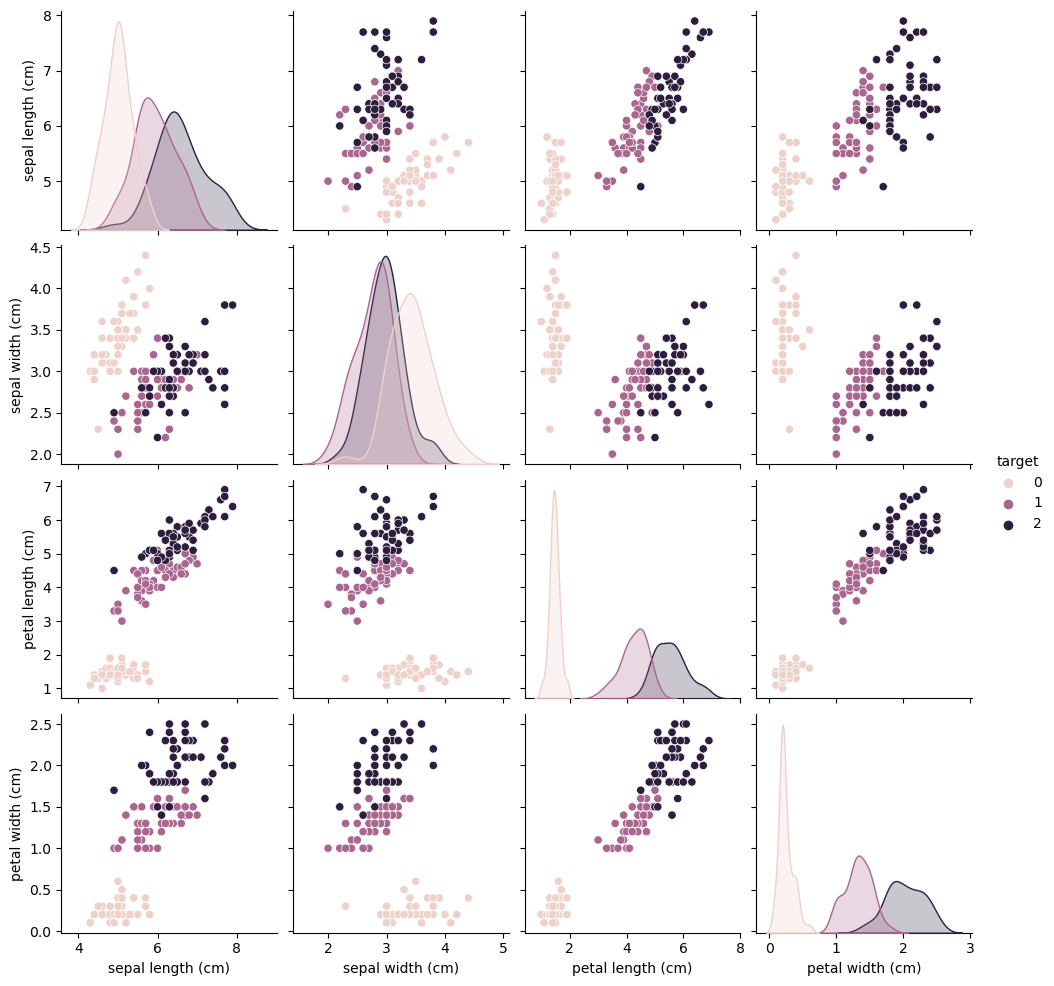

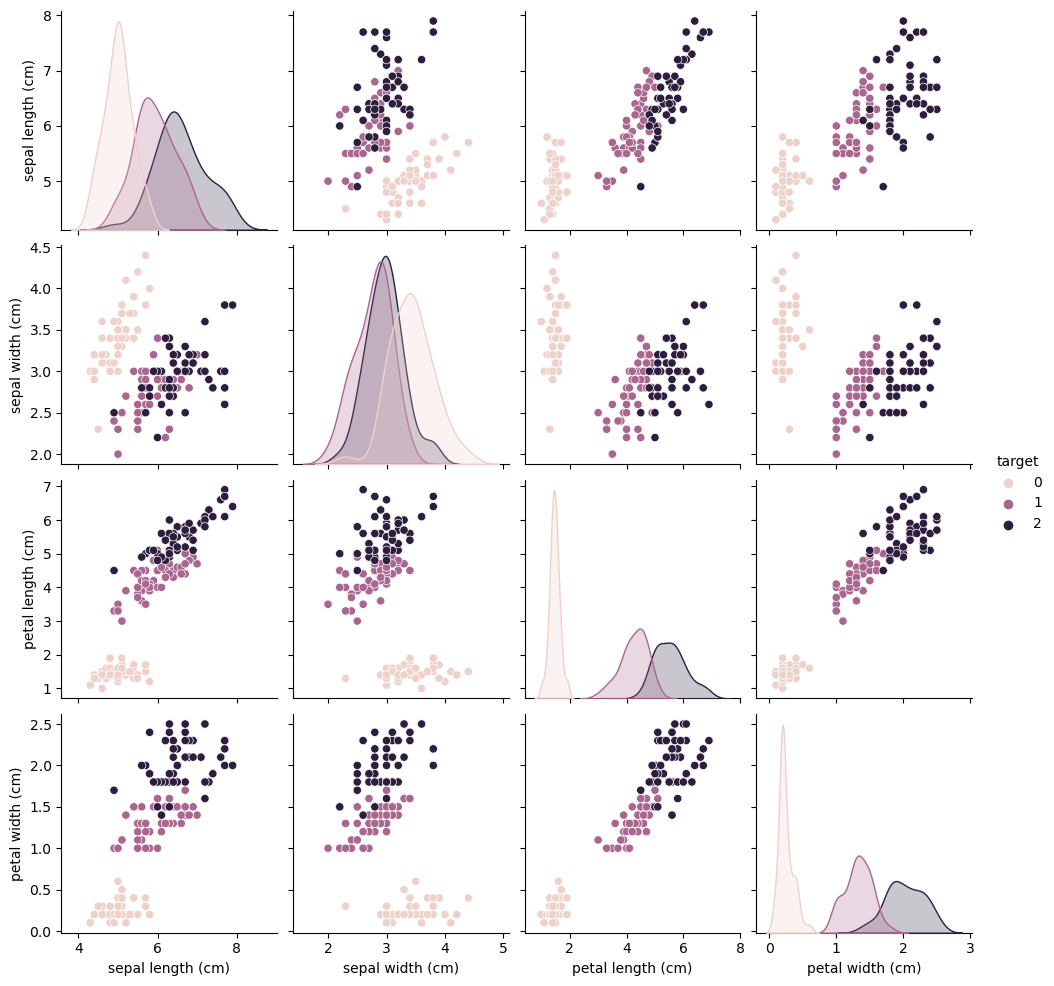

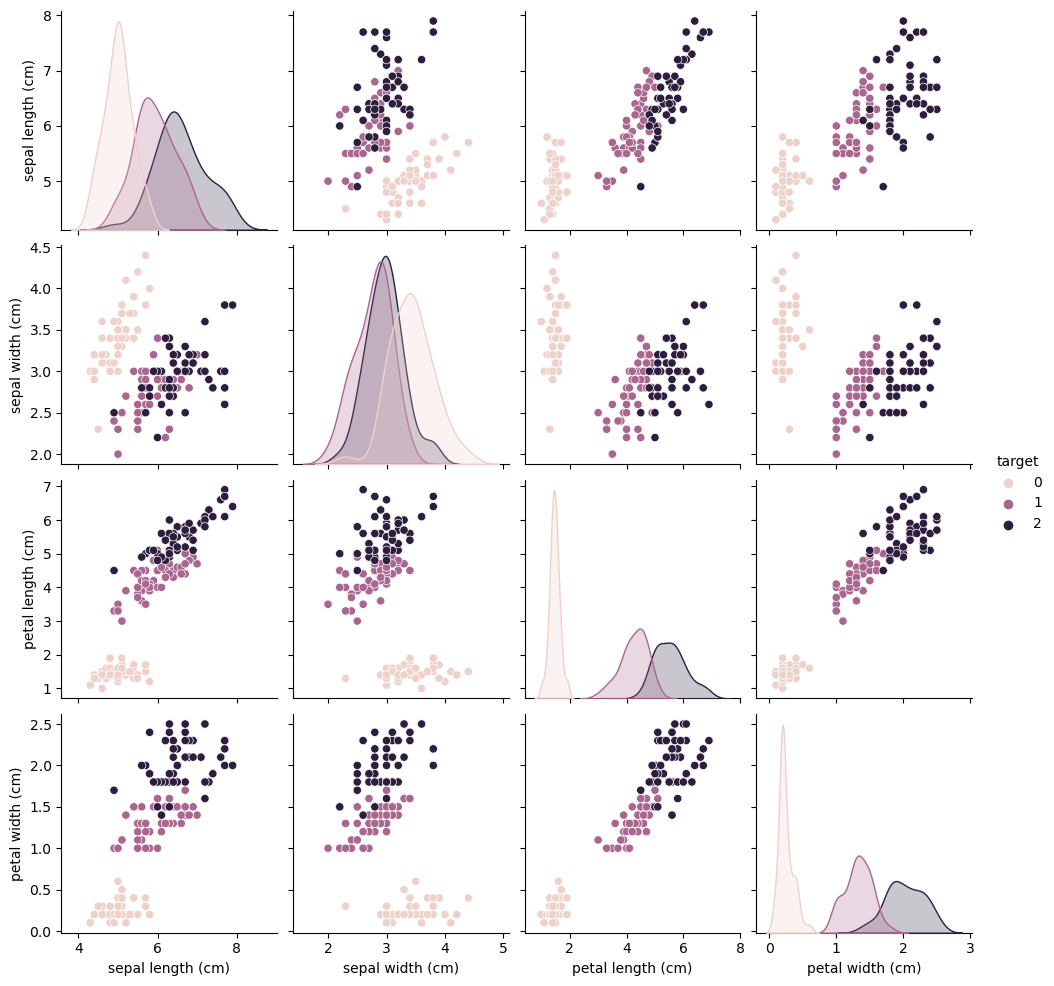

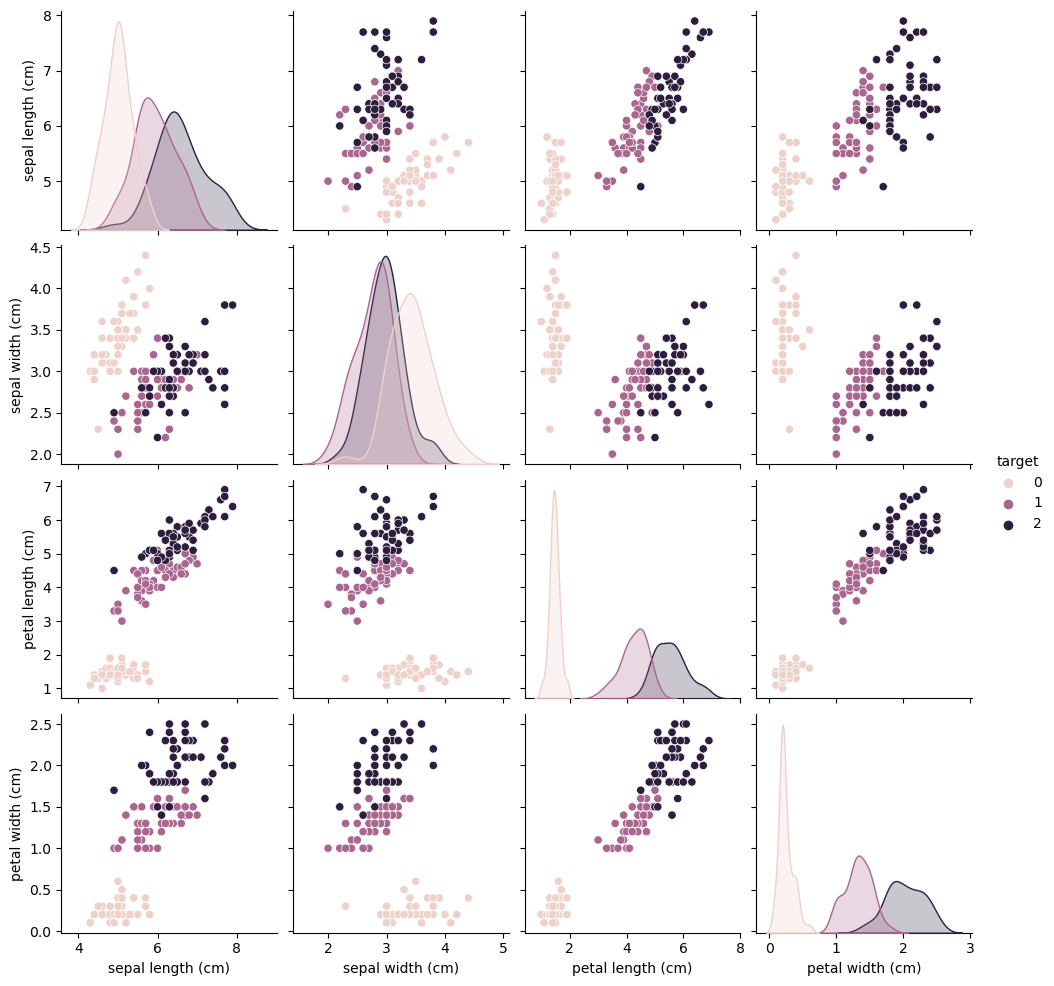

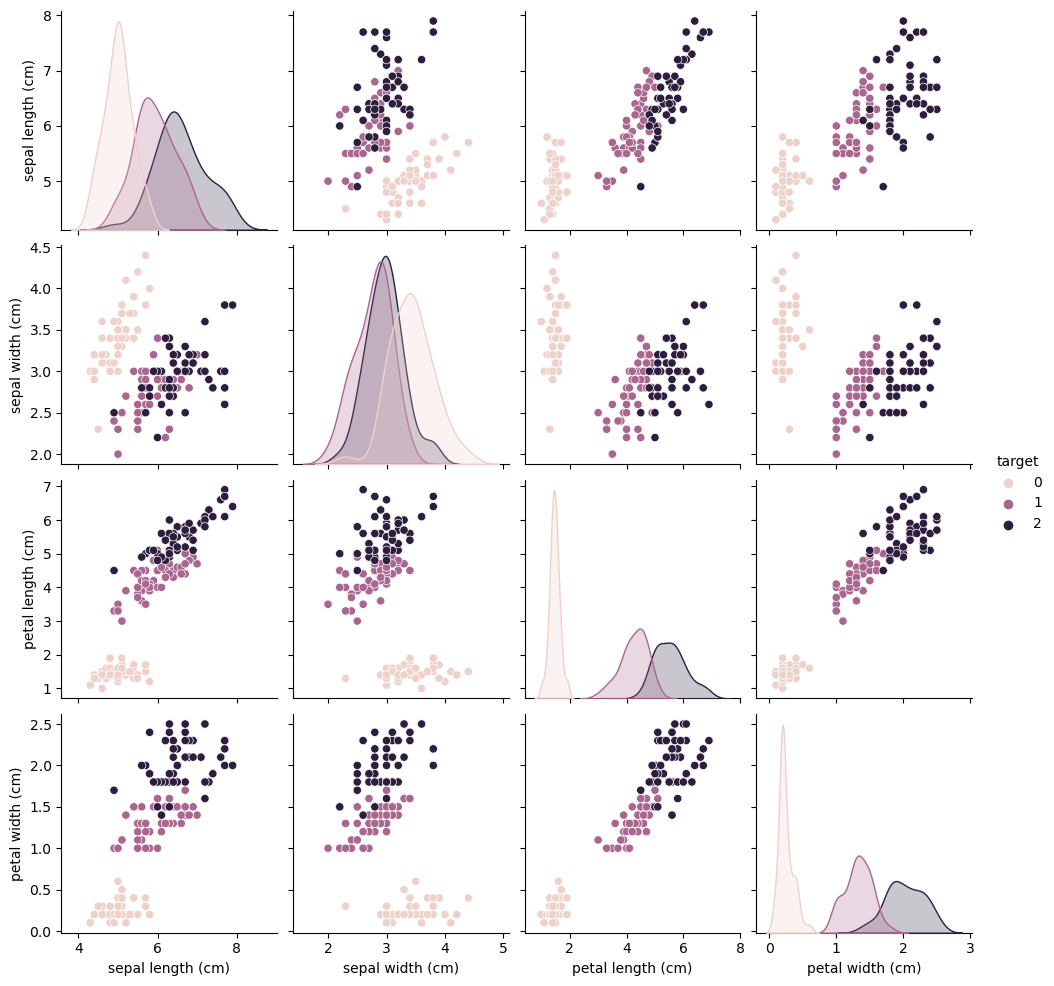

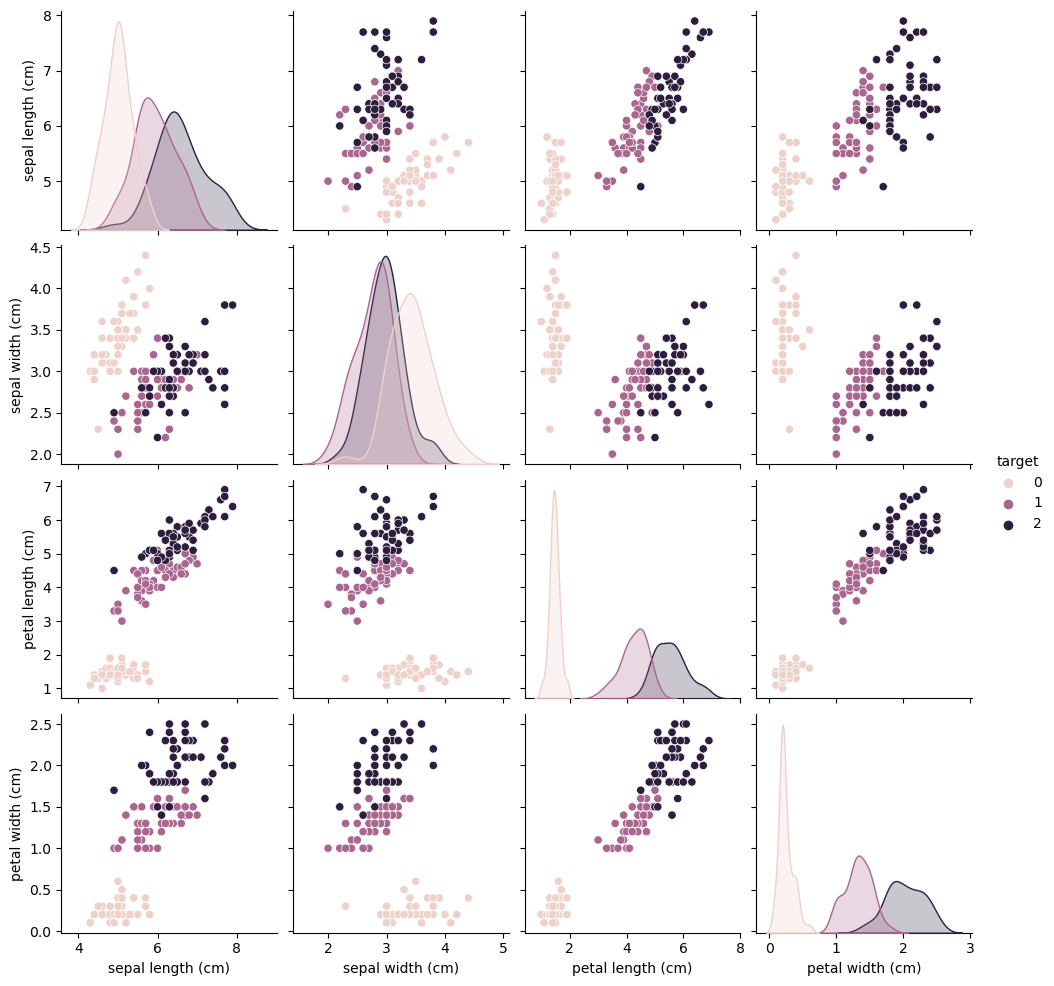

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("viridis")

g = sns.pairplot(iris.frame, hue='target', markers='o')
plt.show()

### Model training

In [23]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [24]:
X = iris.frame.drop(['target'], axis=1)
y = iris.frame['target']

In [25]:
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [28]:
logreg.predict([[4.300000,2.000000,1.000000,0.100000]])

array([0])

### Let's make it more user-friendly

In [31]:
# Provide dimensions
sepal_length = 4.3
sepal_width = 2.0
petal_length = 1.0
petal_width = 0.1

# Make prediction
dimensions = [sepal_length,
              sepal_width,
              petal_length,
              petal_width]

prediction = logreg.predict([dimensions])[0]

# Make prediction readible for a human
iris_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

human_readible_prediction = iris_dict[prediction]

# Give the output
print(f"This is {human_readible_prediction}")

This is setosa


### ...a function

In [34]:
def predict_iris_species(sepal_length,
                         sepal_width,
                         petal_length,
                         petal_width):
    # Make prediction
    dimensions = [sepal_length,
                  sepal_width,
                  petal_length,
                  petal_width]

    prediction = logreg.predict([dimensions])[0]

    # Make prediction readible for a human
    iris_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

    human_readible_prediction = iris_dict[prediction]

    # Give the output
    print(f"This is {human_readible_prediction}")
    return human_readible_prediction

In [35]:
# Provide dimensions
sepal_length = 4.3
sepal_width = 2.0
petal_length = 1.0
petal_width = 0.1

predict_iris_species(sepal_length,
                     sepal_width,
                     petal_length,
                     petal_width)

This is setosa


'setosa'

## Model persistence

In [36]:
from joblib import dump, load
dump(logreg, 'iris_model.joblib')

['iris_model.joblib']

# A standalone function with the model

In [50]:
def load_model_and_predict_iris_species(sepal_length,
                                        sepal_width,
                                        petal_length,
                                        petal_width,
                                        model = "iris_model.joblib"):
    # Load model
    logreg = load(model)
    # Make prediction
    dimensions = [sepal_length,
                  sepal_width,
                  petal_length,
                  petal_width]

    prediction = logreg.predict([dimensions])[0]

    # Make prediction readible for a human
    iris_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

    human_readible_prediction = iris_dict[prediction]

    return human_readible_prediction

In [51]:
load_model_and_predict_iris_species(sepal_length,
                                    sepal_width,
                                    petal_length,
                                    petal_width)

'setosa'

## A class

In [52]:
class IrisModel:
    def __init__(self, model = "iris_model.joblib"):
        self.model = model
        self.logreg = load(self.model)
        
    def predict(self, sepal_length, sepal_width, petal_length, petal_width):
        dimensions = [sepal_length,
                      sepal_width,
                      petal_length,
                      petal_width]
    
        prediction = self.logreg.predict([dimensions])[0]
    
        # Make prediction readible for a human
        iris_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
        human_readible_prediction = iris_dict[prediction]        
        
        return human_readible_prediction

In [45]:
# Create instance of IrisModel class
my_iris = IrisModel()

In [48]:
# Provide dimensions
sepal_length = 4.3
sepal_width = 2.0
petal_length = 1.0
petal_width = 0.1

In [49]:
# Make prediction
my_iris.predict(sepal_length, sepal_width, petal_length, petal_width)

'setosa'

## Compare compute time

In [54]:
%timeit load_model_and_predict_iris_species(sepal_length, sepal_width, petal_length, petal_width)

407 µs ± 30.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [55]:
%timeit my_iris.predict(sepal_length, sepal_width, petal_length, petal_width)

41.7 µs ± 931 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
